<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Regularization_in_regression_Lasso_and_Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Supervised**: `Regularization`

**Definition**: Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients. In simple terms, it reduces parameters and shrinks (simplifies) the model. This more streamlined, more parsimonious model will likely perform better at predictions. Regularization adds penalties to more complex models and then sorts potential models from least overfit to greatest; The model with the lowest “overfitting” score is usually the best choice for predictive power.

L1 and L2 regularization are two common techniques used to prevent overfitting in linear regression models. They add a penalty term to the linear regression cost function (SSE), which discourageous the model from fitting the training data to closely by adding complexity.

**L1 Regularization**

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, adds a penalty term to the linear regression cost function that is proportional to the absolute values of the regression coefficients. The L1 regularization term encourages sparsity in the model, meaning it tends to force some of the regression coefficients to be exactly zero. This has the effect of feature selection, where some features are effectively excluded from the model.

$$J(m,b) = \sum\limits_{i=1}^n (y_i - (mx_i+b))^2 + \lambda|m|$$

**L2 Regularization**

L2 regularization, also known as Ridge regression, adds a penalty term to the linear regression cost function that is proportional to the square of the regression coefficients. The L2 regularization helps to reduce the magnitude of the coefficients but doesn't force them to be exactly zero. It smooths out the impact of individual features on the model, making the model more robust and less sensitive to outliers.

$$J(m,b) = \sum\limits_{i=1}^n (y_i - (mx_i+b))^2 + \lambda m^2$$

The regularization parameters (lambda or alpha) is used to control the trade-off between fitting the data and preventing overfitting in both L1 and L2 regularization. When increasing $\lambda$:

- Reduce model complexity
- Increase bias in the model
- Making it less sensitive to noise in the training data
- Can indirectly help with multicollinearity

In [1]:
# Import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Generate synthetic data
np.random.seed(0)

X = np.random.rand(100,1)
y =  2 * X + 1 + 0.1 * np.random.rand(100,1)

# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((80, 1), (20, 1))

Create three different regression models: Linear Regression (no regularization), Lasso, and Ridge. Fit these models to the training data.

In [3]:
# Create a range of alpha values for regularization strength
alphas = np.logspace(-2, 0.5, 200)

# create lists to store the coefficient for each type of regression
coefs_lasso = []
coefs_ridge = []
coefs_no_reg = []

# fit models with different alphas and record the coefficient
for alpha in alphas:
    # Lasso
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_[0])

    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_[0])

    # Linear regression/no regularization
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    coefs_no_reg.append(lr.coef_[0])

# make prediction with last alpha
y_lasso = lasso.predict(X_test)
y_ridge = ridge.predict(X_test)
y_lr = lr.predict(X_test)

# Calculate MSE for each model
mse_lasso = mean_squared_error(y_test, y_lasso)
mse_ridge = mean_squared_error(y_test, y_ridge)
mse_lr = mean_squared_error(y_test, y_lr)


Now, let's create a plot to compare the results. First, we will visualize the effects of lambda on each coefficients of the three models.

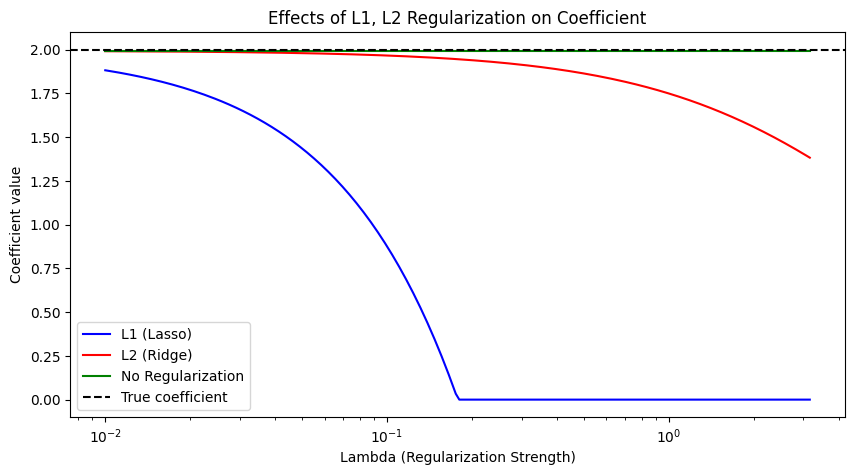

In [4]:
# Set figure size
plt.figure(figsize=(10, 5))
# Create the plot
plt.plot(alphas, coefs_lasso, label='L1 (Lasso)', color='b')
plt.plot(alphas, coefs_ridge, label='L2 (Ridge)', color='r')
plt.plot(alphas, coefs_no_reg, label='No Regularization', color='g')
plt.axhline(2, color='k', linestyle='--', label='True coefficient')
# Set scale of axis
plt.xscale('log')
plt.axis('tight')
# Set plot labels and title
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Coefficient value')
plt.title('Effects of L1, L2 Regularization on Coefficient')
plt.legend()
# Show the plot
plt.show()

Next, we will visualize the original data, and the predictions made by the three models.

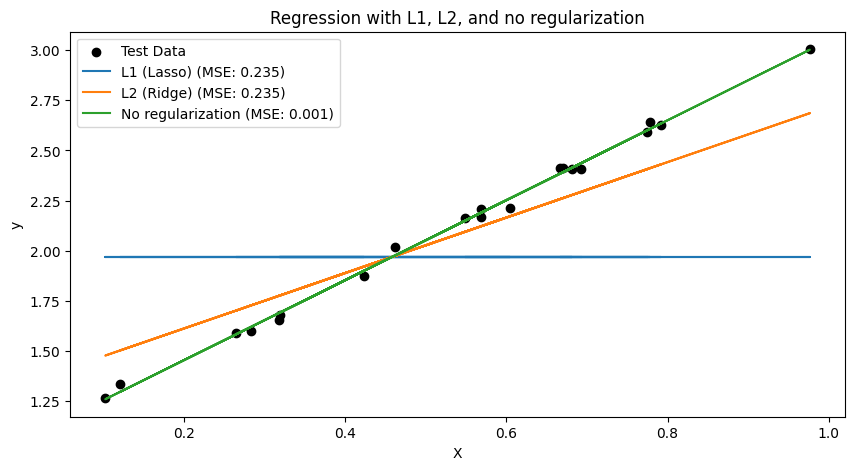

In [5]:
# set figure size
plt.figure(figsize=(10,5))

# Plot the data points
plt.scatter(X_test, y_test, label='Test Data', color='black')

# Plot the model prediction
plt.plot(X_test, y_lasso, label=f'L1 (Lasso) (MSE: {mse_lasso:.3f})')
plt.plot(X_test, y_ridge, label=f'L2 (Ridge) (MSE: {mse_lasso:.3f})')
plt.plot(X_test, y_lr, label=f'No regularization (MSE: {mse_lr:.3f})')

# set plot and labels
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression with L1, L2, and no regularization')
plt.legend()

# show the plot
plt.show()

### **Regularization in** `Regression Model`

#### **Load Dataset**

In [7]:
boston_housing_csv = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/boston_housing.csv'
data = pd.read_csv(boston_housing_csv).drop(columns=['Unnamed: 0'])
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27,19.8
308,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54,22.8
260,0.54011,20.0,3.97,0.0,0.647,7.203,81.8,2.1121,5.0,264.0,13.0,392.80,9.59,33.8
148,2.33099,0.0,19.58,0.0,0.871,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32,17.8


Define features and target

In [8]:
X = data.drop(columns='MEDV')
y = data['MEDV']

Split the dataset into two portions: the training set and the testing set. The training set (seen data) is used to train your machine learning model, while the testing set (unseen data) is used to evaluate its performance.

In [9]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# set alpha
alphas = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]

In [10]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# Create a column Transformer
transformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), list(X_train.columns)) # We use all columns
], remainder='passthrough')

# fit and transform your data using preprocessor
X_train_scale = transformer.fit_transform(X_train) # fitting only to training data. So, no information leakage
X_test_scale = transformer.transform(X_test) # transform test test

#### **Ridge Regression**

In [12]:
# Create lists to store the mse score
ridge_mse_score_test = []
ridge_mse_score_train = []
# Fit models with different alphas and record the coefficient
for alpha in alphas:
    # Define and train the model
    ridge_regression = Ridge(alpha=alpha)
    ridge_regression.fit(X_train_scale, y_train)
    # Make prediction
    y_predict_train = ridge_regression.predict(X_train_scale)
    y_predict_test = ridge_regression.predict(X_test_scale)
    # Calculate MSE for each model
    ridge_mse_score_train.append(mean_squared_error(y_train, y_predict_train))
    ridge_mse_score_test.append(mean_squared_error(y_test, y_predict_test))
pd.DataFrame({
    'alpha': alphas,
    'mse train': ridge_mse_score_train,
    'mse test': ridge_mse_score_test
})

,alpha,mse train,mse test
0,10000.000,85.923610,74.066471
1,1000.000,78.898636,66.908090
2,100.000,54.830888,44.553457
3,10.000,29.049254,26.371662
4,1.000,21.980329,23.730076
5,0.100,21.646507,24.197875
6,0.010,21.641466,24.281251
7,0.001,21.641413,24.290127


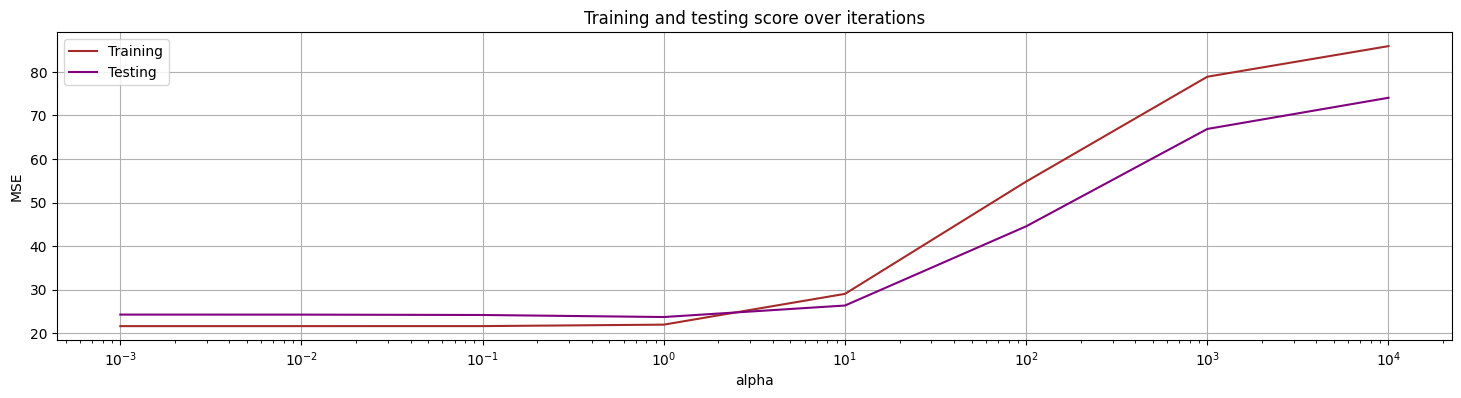

In [13]:
# plot the training and testing scores
plt.figure(figsize=(18,4))
plt.plot(alphas, ridge_mse_score_train, label='Training', c='brown')
plt.plot(alphas, ridge_mse_score_test, label='Testing', c='purple')

# set scale of axis
plt.xscale('log')
plt.axis('tight')

# set label & title
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Training and testing score over iterations')

# displaying the plot
plt.grid()
plt.legend()
plt.show()

**Insight**

When alpha is set to a high value, It causes the model to tends to underfitting. because both the mse on the training set and test set are large and will continue to increase as alpha increases. In the graph, the ideal condition is achieved when alpha equals 10, where the gap between MSE on training and testing is small.

**Best Model: alpha = 1**

In [14]:
# Define and train the model
best_model = Ridge(alpha=1)
best_model.fit(X_train_scale, y_train)

# Make prediction test set
y_pred = best_model.predict(X_test_scale)

# MSE
MSE = mean_squared_error(y_test, y_pred)
MSE

23.730076213059387

In [15]:
df_coef = pd.DataFrame({
    'feature': X_train.columns,
    'coef': best_model.coef_}).sort_values('coef')

df_coef

,feature,coef
12,LSTAT,-17.860255
7,DIS,-12.468908
10,PTRATIO,-8.419289
0,CRIM,-6.968549
4,NOX,-6.617800
9,TAX,-4.319275
6,AGE,-0.376018
2,INDUS,0.006465
1,ZN,2.012455
3,CHAS,3.070634


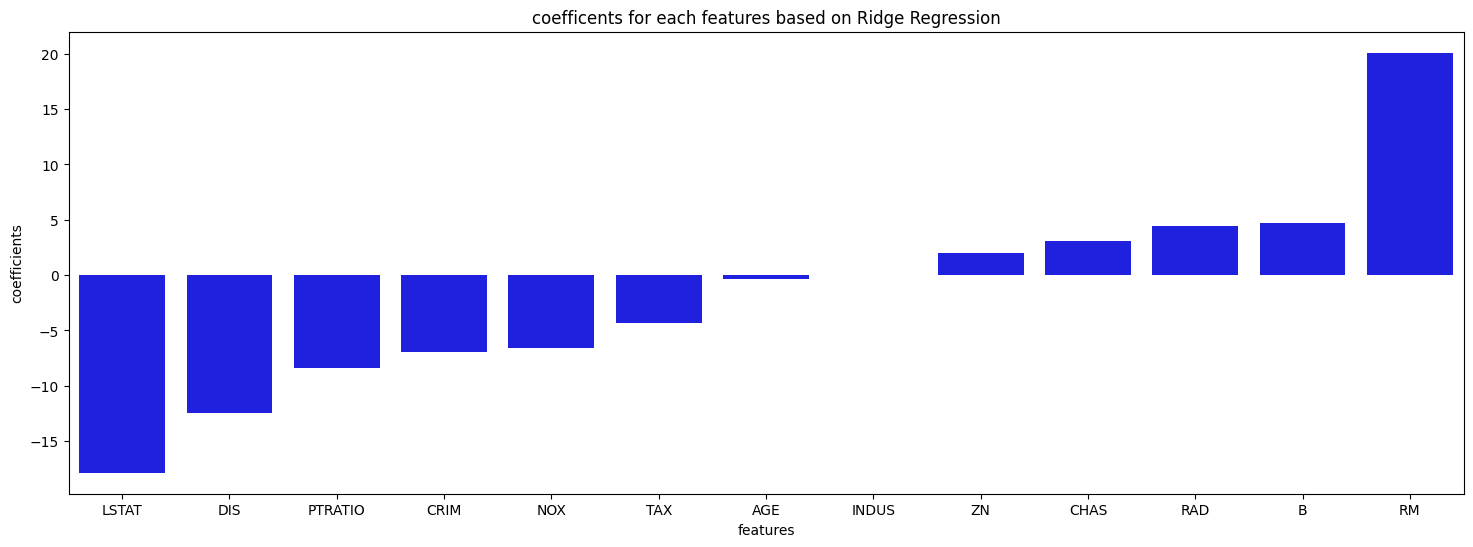

In [16]:
# Coefficient based on ridge regression

import seaborn as sns

# plot the coeficients
plt.figure(figsize=(18,6))
sns.barplot(data=df_coef, x='feature', y='coef', color='blue')

# set label and title
plt.xlabel('features')
plt.ylabel('coefficients')
plt.title('coefficents for each features based on Ridge Regression')

# display
plt.show()


#### **Lasso Regression**

In [17]:
# Create lists to store the mse score
lasso_mse_score_test = []
lasso_mse_score_train = []
# Fit models with different alphas and record the coefficient
for alpha in alphas:
    # Define and train the model
    lasso_regression = Lasso(alpha=alpha)
    lasso_regression.fit(X_train_scale, y_train)
    # Make prediction
    y_predict_train = lasso_regression.predict(X_train_scale)
    y_predict_test = lasso_regression.predict(X_test_scale)
    # Calculate MSE for each model
    lasso_mse_score_train.append(mean_squared_error(y_train, y_predict_train))
    lasso_mse_score_test.append(mean_squared_error(y_test, y_predict_test))
pd.DataFrame({
    'alpha': alphas,
    'mse train': lasso_mse_score_train,
    'mse test': lasso_mse_score_test
})

,alpha,mse train,mse test
0,10000.000,86.873404,75.045430
1,1000.000,86.873404,75.045430
2,100.000,86.873404,75.045430
3,10.000,86.873404,75.045430
4,1.000,65.506879,54.458243
5,0.100,25.262421,26.529024
6,0.010,21.745152,24.368865
7,0.001,21.642537,24.284958


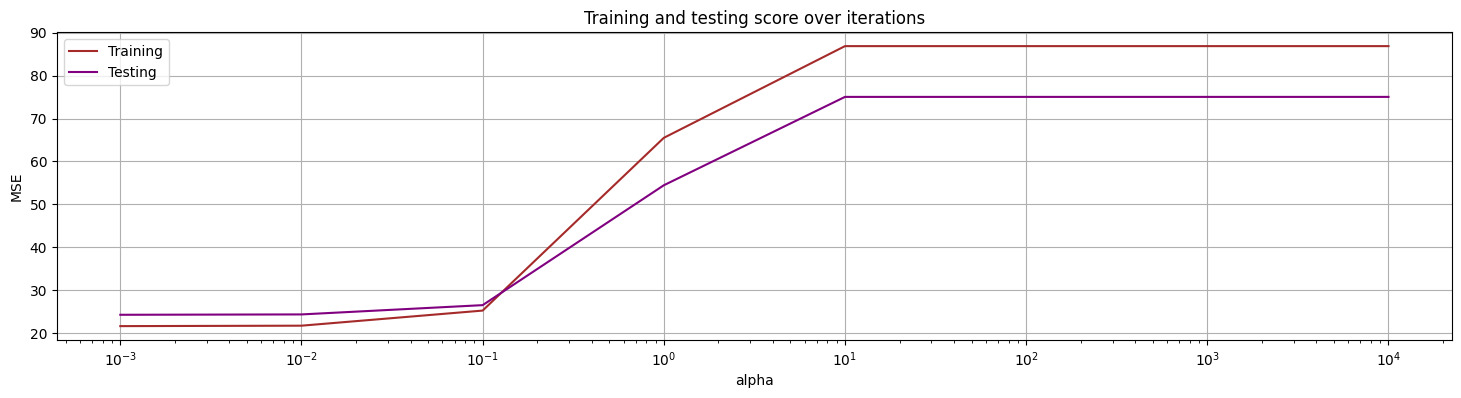

In [18]:
# MSE between training and testing

# plot the training and testing scores
plt.figure(figsize=(18,4))
plt.plot(alphas, lasso_mse_score_train, label='Training', c='brown')
plt.plot(alphas, lasso_mse_score_test, label='Testing', c='purple')

# set scale of axis
plt.xscale('log')
plt.axis('tight')

# set label & title
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Training and testing score over iterations')

# displaying the plot
plt.grid()
plt.legend()
plt.show()

**Insight**

When alpha is set to a high value, It causes the model to also tends to underfitting, as the mse on the training set and test set are large and will continue to increase as alpha increases until a steady state. In the graph, the ideal condition is achieved when alpha equals 0.1, where the gap between MSE on training and testing is small.

**Best Model: alpha = 0.1**

In [19]:
# Define and train the model
best_model = Lasso(alpha=0.1)
best_model.fit(X_train_scale, y_train)

# Make prediction test set
y_pred = best_model.predict(X_test_scale)

# MSE
MSE = mean_squared_error(y_test, y_pred)
MSE

26.529024043336488

In [20]:
df_coef = pd.DataFrame({
    'feature': X_train.columns,
    'coef': best_model.coef_}).sort_values('coef')

df_coef

,feature,coef
12,LSTAT,-18.661081
10,PTRATIO,-6.503767
7,DIS,-1.977043
9,TAX,-1.100089
6,AGE,-0.000000
0,CRIM,-0.000000
2,INDUS,-0.000000
1,ZN,0.000000
4,NOX,-0.000000
8,RAD,-0.000000


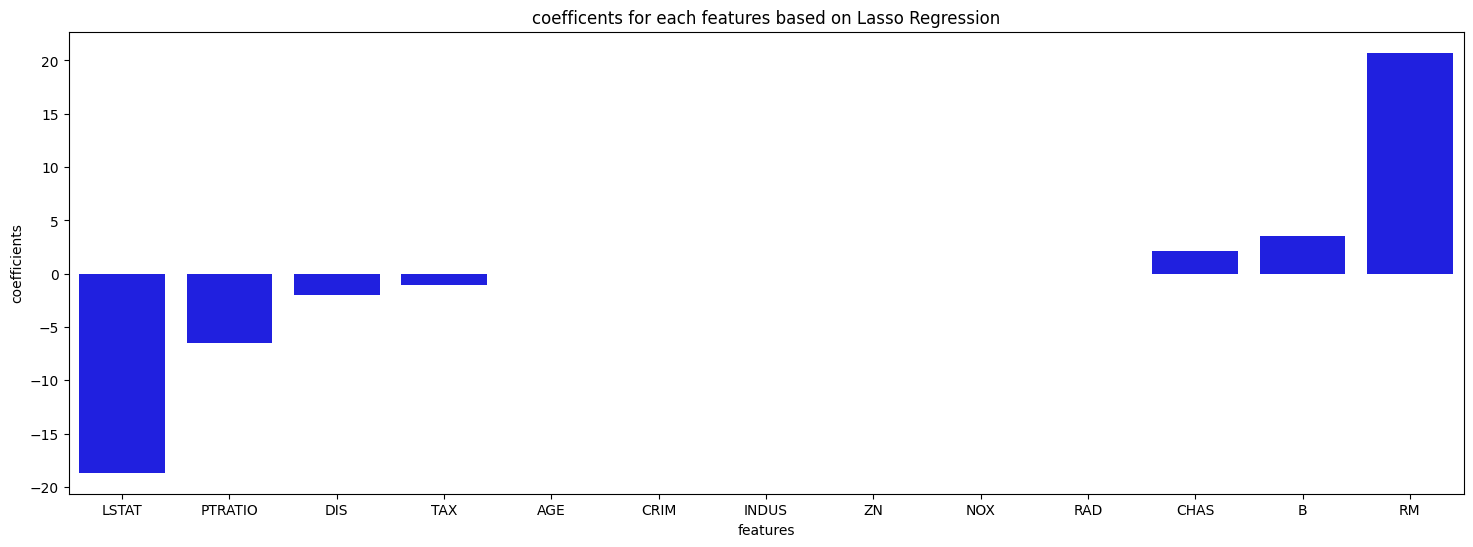

In [21]:
# Coefficient based on lasso regression

import seaborn as sns

# plot the coeficients
plt.figure(figsize=(18,6))
sns.barplot(data=df_coef, x='feature', y='coef', color='blue')

# set label and title
plt.xlabel('features')
plt.ylabel('coefficients')
plt.title('coefficents for each features based on Lasso Regression')

# display
plt.show()


So using lasso can remove various features, reduce multicollinearity, reduce overfitting that ultimately helping to reduce model complexity.